# Stock Price Predictor

The first step is to load the required modules to make the predictions we need.

In [1]:
%matplotlib notebook

import sys, os, pdb
import uuid, json, time
import pandas as pd

# import predictions algorithms
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

sys.path.append(os.getcwd() + '/src')
# import main stocks predictor / data preprocessing file
import lib.stocks as st
import lib.visualizer as vzr

#### Configurations & Parameters

Below we set the tickers we would like to train on and the dates for starting predictions.

In [2]:
DATE_TRAIN_START = '2017-01-01'
DATE_TEST_START = '2018-09-01'
DATE_END = '2018-12-31'

WINDOWS = [5]
HORIZONS = [7]

TICKERS_TRAIN = ['AMZN', 'AAPL', 'CSCO', 'NVDA', 'NFLX']
TICKERS_PREDICT = ['NVDA', 'NFLX']

The next step is to create a directory where we will save the transformed data. This is done to avoid loading many data files in memeory since our algorithm may apply multiple windows and horizons (a file for each).

Once we've created a directory, we proceed to load a single data representing needed information about all the specified stocks __before__ transformation.

In [3]:
# create a directory with a unique ID
TRIAL_ID = uuid.uuid1()
DIRECTORY = "_trials/{}".format(TRIAL_ID)
os.makedirs(DIRECTORY)

print("Loading data for {}...".format(', '.join(TICKERS_TRAIN)))

data_files = st.loadMergedData(
    WINDOWS, HORIZONS, TICKERS_TRAIN, TICKERS_PREDICT,
    DATE_TRAIN_START, DATE_END, DIRECTORY
)

print("A new trial started with ID: {}\n".format(TRIAL_ID))
print("The data files generated are:")
print(data_files)

Loading data for AMZN, AAPL, CSCO, NVDA, NFLX...
AMZN Index(['adj_close_AMZN', 'volume_AMZN', 'returns_AMZN'], dtype='object')
AAPL Index(['adj_close_AAPL', 'volume_AAPL', 'returns_AAPL'], dtype='object')
CSCO Index(['adj_close_CSCO', 'volume_CSCO', 'returns_CSCO'], dtype='object')
NVDA Index(['adj_close_NVDA', 'volume_NVDA', 'returns_NVDA'], dtype='object')
NFLX Index(['adj_close_NFLX', 'volume_NFLX', 'returns_NFLX'], dtype='object')
> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(331)loadMergedData()
-> finance = interpolateData(finance)
(Pdb) c
Count missing: 0
> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(343)loadMergedData()
-> file_path = '{}/finance_w{}_h{}.csv'.format(files_directory, h, w)
(Pdb) c
A new trial started with ID: 617803ea-290b-11e9-9cc1-9cb6d06b490b

The data files generated are:
[(7, 5, '_trials/617803ea-290b-11e9-9cc1-9cb6d06b490b/finance_w7_h5.csv')]


Now we create a list of regressors which we would like to use for making predictions:

In [4]:
classifiers = [
    ('GradientBoosted', MultiOutputRegressor(GradientBoostingRegressor())),
    # ('AdaBoost', MultiOutputRegressor(AdaBoostRegressor()))
]

,adj_close_AMZN,volume_AMZN,returns_AMZN,roll_mean_2_AMZN,roll_mean_3_AMZN,roll_mean_4_AMZN,adj_close_AAPL,volume_AAPL,returns_AAPL,roll_mean_2_AAPL,...,returns_NFLX_2,adj_close_NFLX_2,returns_NFLX_3,adj_close_NFLX_3,returns_NFLX_4,adj_close_NFLX_4,returns_NFLX_5,adj_close_NFLX_5,returns_NFLX_6,adj_close_NFLX_6
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,832.35,0.227268,0.010771,827.915,828.736667,830.4950,127.159749,1.276073,0.060981,123.505450,...,0.020696,155.35,-0.000491,162.99,0.002037,182.03,0.000172,174.740,0.007993,198.000
2017-01-03,853.08,-0.012036,0.009514,849.060,848.920000,848.0000,138.657681,0.550688,0.020439,137.269021,...,-0.000491,162.99,0.002037,182.03,0.000172,174.74,0.007993,198.000,-0.004052,186.820
2017-01-05,948.43,-0.255952,0.025341,936.710,930.726667,925.3675,145.412519,0.620905,0.020536,143.949467,...,0.002037,182.03,0.000172,174.74,0.007993,198.00,-0.004052,186.820,0.034990,133.700
2017-01-06,995.95,-0.390600,0.001337,995.285,995.756667,995.7625,152.560992,-0.301462,0.002749,152.351840,...,0.000172,174.74,0.007993,198.00,-0.004052,186.82,0.034990,133.700,0.014466,133.295
2017-01-08,996.19,-0.389869,0.008514,991.985,1001.336667,1012.5025,149.443640,0.273025,0.008062,148.846065,...,0.007993,198.00,-0.004052,186.82,0.034990,133.70,0.014466,133.295,-0.006058,132.890


> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(134)prepareDataForClassification()
-> return X_train, y_train, X_test, y_test
(Pdb) c
Starting an iteration with a horizon of 7 and a window of 5...
Training and testing the GradientBoosted model...

Below is a sample of of the results:



/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


,adj_close_NFLX_pred,adj_close_NFLX_true,adj_close_NVDA_pred,adj_close_NVDA_true
Date,,,,
2018-09-14,280.164387,281.368421,235.254003,236.214211
2018-09-25,236.284897,237.555789,228.864923,228.237895
2018-10-07,213.536596,213.194286,221.337921,223.728429
2018-10-16,214.949646,214.542857,221.208129,223.825286
2018-10-22,214.837939,215.441905,221.208129,223.889857
2018-10-26,214.837939,216.340952,221.175501,223.954429
2018-11-14,217.288354,218.872273,224.446656,223.503545
2018-12-07,319.234865,321.300000,248.700354,249.760000
2018-12-09,319.234865,321.300000,248.700354,249.760000


<IPython.core.display.Javascript object>


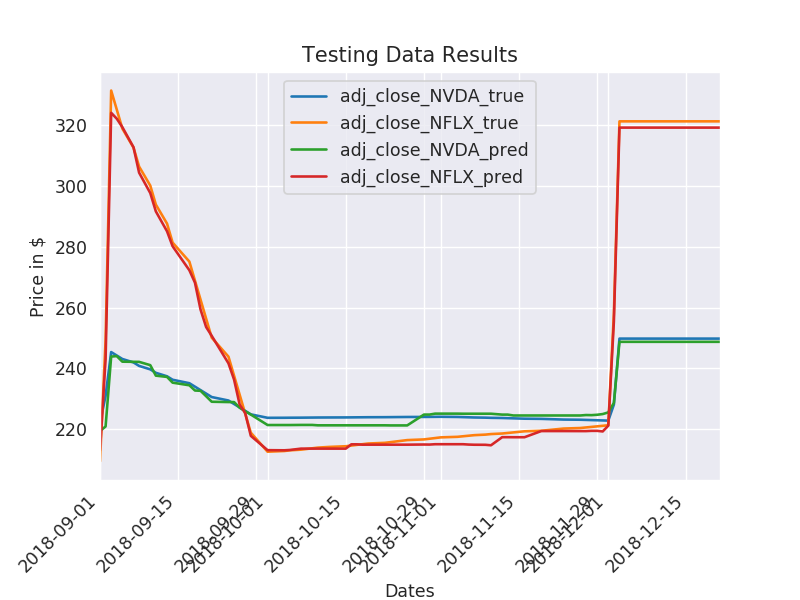

{
    "H7_W5": {
        "cross_validation_GradientBoosted": 3.046,
        "accuracy_GradientBoosted": 0.6599938672704719,
        "window": 5,
        "horizon": 7,
        "time_lapsed": 2.33540415763855
    }
}


In [5]:
from IPython.display import display

# - combine the results of each classifier along with its w + h into a response object
all_results = {}

# - train each of the models on the data and save the highest performing
#         model as a pickle file
for h, w, file_path in data_files:
    # Start measuing time
    time_start = time.time()
    
    # load data
    finance = pd.read_csv(file_path, encoding='utf-8', header=0)
    finance = finance.set_index(finance.columns[0])
    finance.index.name = 'Date'
    finance.index = pd.to_datetime(finance.index)
    
    display(finance.sort_index().head())
    
    # perform preprocessing
    X_train, y_train, X_test, y_test = \
        st.prepareDataForClassification(finance, DATE_TEST_START, TICKERS_PREDICT, h, w)

    results = {}

    print("Starting an iteration with a horizon of {} and a window of {}...".format(h, w))

    for i, clf_ in enumerate(classifiers):
        print("Training and testing the {} model...".format(clf_[0]))
        
        # perform k-fold cross validation
        results['cross_validation_%s'%clf_[0]] = \
            st.performCV(X_train, y_train, 10, clf_[1], clf_[0])
        
        # perform predictions with testing data and record result
        preds, results['accuracy_%s'%clf_[0]] = \
            st.trainPredictStocks(X_train, y_train, X_test, y_test, clf_[1], DIRECTORY)

        print("\nBelow is a sample of of the results:\n")
        display(preds.sample(10).sort_index().reindex_axis(sorted(preds.columns), axis=1))
            
        # plot results
        vzr.visualize_predictions(preds.sort_index(ascending=False), title='Testing Data Results')

    results['window'] = w
    results['horizon'] = h

    # Stop time counter
    time_end = time.time()
    results['time_lapsed'] = time_end - time_start

    all_results['H%s_W%s'%(h, w)] = results

print(json.dumps(all_results, indent=4))